# Harmonic Oscillator 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

## Step response

<IPython.core.display.Javascript object>


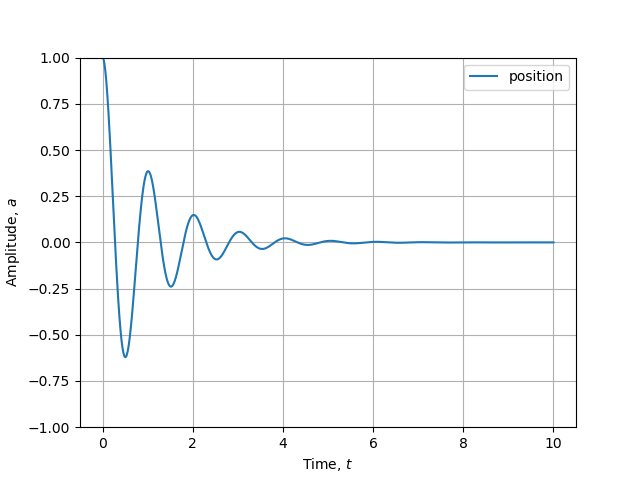

interactive(children=(FloatSlider(value=0.05, description='zeta', max=1.0, step=0.01), FloatSlider(value=6.283…

In [17]:
def ode(X, t, zeta, omega0):
    """
    Free Harmonic Oscillator ODE
    """
    x, dotx = X
    ddotx = -2*zeta*omega0*dotx - omega0**2*x
    return [dotx, ddotx]

def update(zeta = 0.05, omega0 = 2.*np.pi):
    """
    Update function.
    """
    X0 = [1., 0.]
    sol = integrate.odeint(ode, X0, t, args = (zeta, omega0))
    line0.set_ydata(sol[:, 0])

Nt = 1000
t = np.linspace(0., 10., Nt)
dummy = np.zeros_like(t)
fig = plt.figure()
line0, = plt.plot(t, dummy, label = "position")
plt.grid()
plt.ylim(-1., 1.)
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $a$")
plt.legend()

ipw.interact(update, zeta = (0., 1., 0.01), 
           omega0 = (2.*np.pi*0.05, 2.*np.pi*5, 2.*np.pi*0.01));

## Sinusoidal driving force

<IPython.core.display.Javascript object>


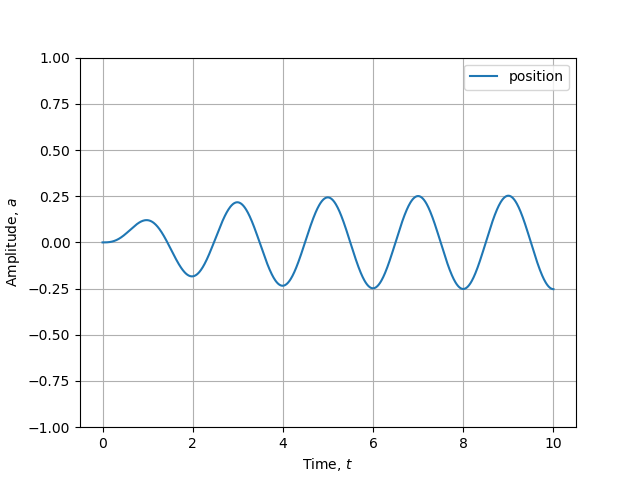

interactive(children=(FloatSlider(value=0.05, description='zeta', max=0.2, step=0.01), FloatSlider(value=6.283…

In [24]:
def ode(X, t, zeta, omega0, omegad_omega0):
    """
    Free Harmonic Oscillator ODE
    """
    x, dotx = X
    omegad = omegad_omega0 * omega0
    ddotx = -2*zeta*omega0*dotx - omega0**2*x + F_m * np.sin(omegad * t)
    return [dotx, ddotx]

def update(zeta = 0.05, omega0 = 2.*np.pi, omegad_omega0 = 1.):
    """
    Update function.
    """
    X0 = np.zeros(2)
    sol = integrate.odeint(ode, X0, t, args = (zeta, omega0, omegad_omega0))
    line0.set_ydata(sol[:, 0])

Nt = 1000
F_m = 1.
t = np.linspace(0., 10., Nt)
dummy = np.zeros_like(t)
fig = plt.figure()
line0, = plt.plot(t, dummy, label = "position")
plt.grid()
plt.ylim(-1., 1.)
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $a$")
plt.legend()

ipw.interact(update, zeta = (0., .2, 0.01), 
             omega0 = (2.*np.pi*0.5, 2.*np.pi*5, 2.*np.pi*0.01),
             omegad_omega0 = (0.1, 2., 0.05));